<a href="https://colab.research.google.com/github/SravaniKarri137/Elections_2024/blob/main/WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************************************
                 Lok Sabha Elections                   
******************************************************


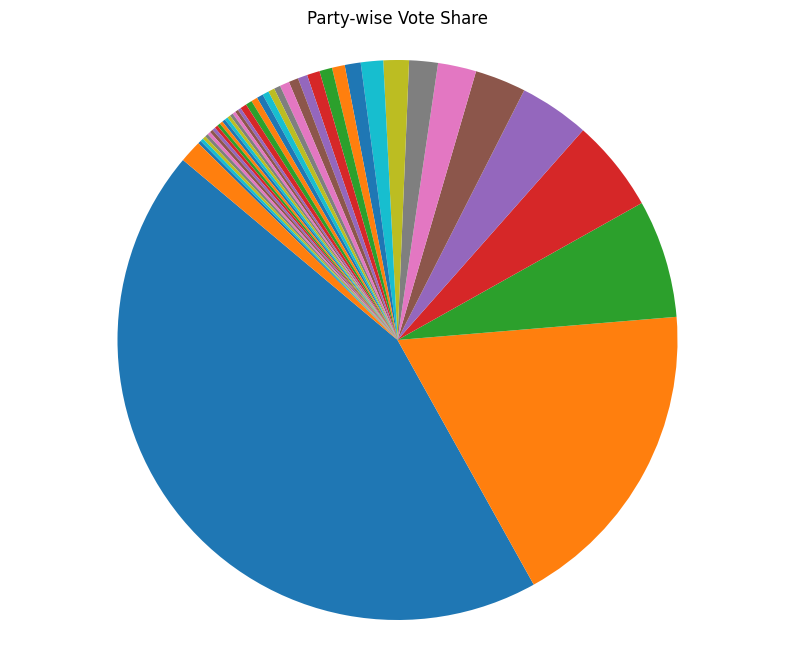

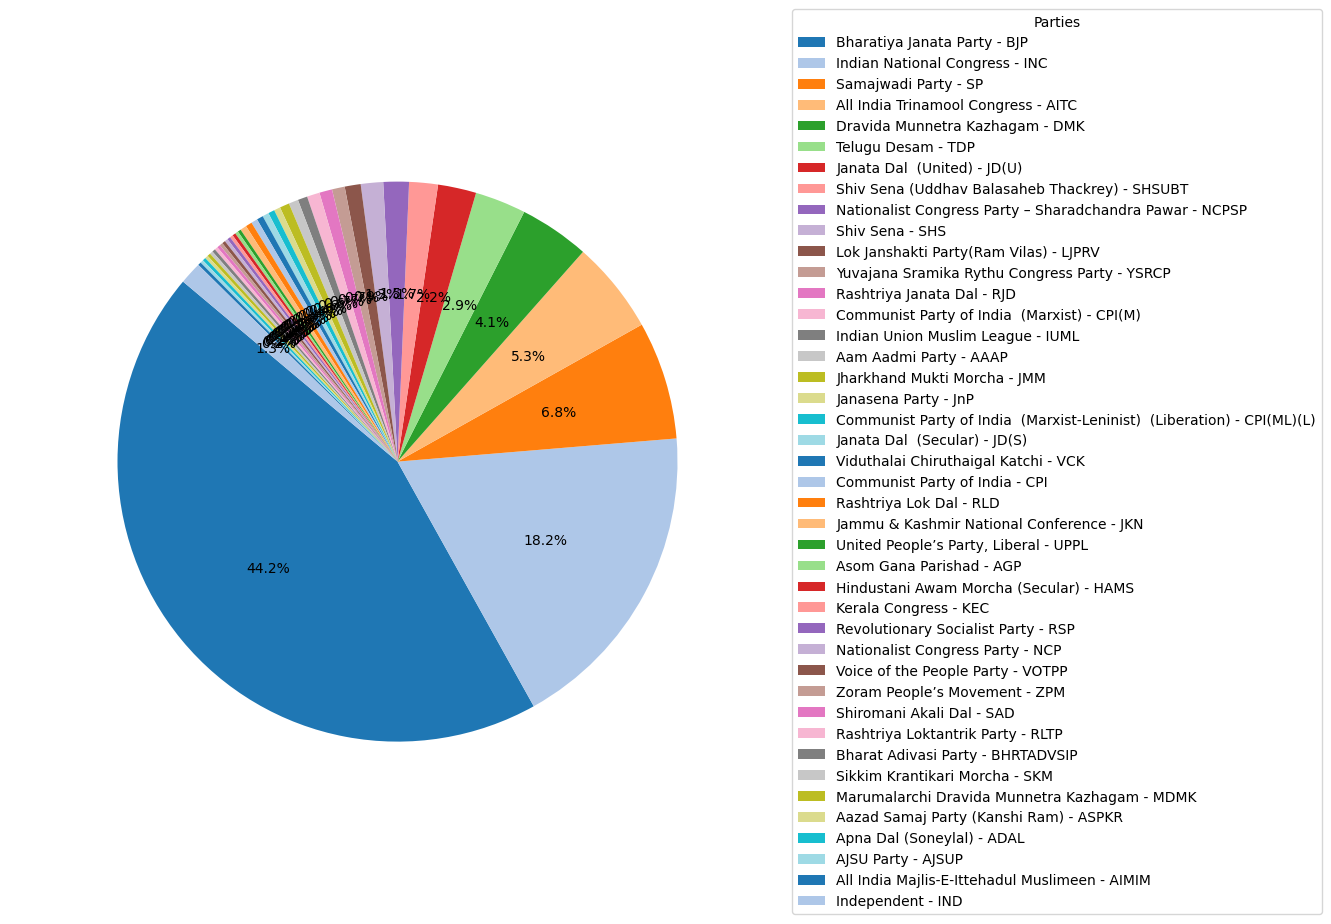

In [6]:
# -*- coding: utf-8 -*-
"""


@author: sravani_karri
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

print("*******************************************************")
print("                 Lok Sabha Elections                   ")
print("******************************************************")

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Example: Find tables with election results
tables = soup.find_all('table')

#Extract headers
headers = soup.find_all('th')[0:4]
headers = [ele.text.strip() for ele in headers]


# Extract data into a DataFrame
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
df = pd.DataFrame(data, columns=headers)
df.to_csv(r'C:\Users\padma\Downloads\internship\lok_sabha_results.csv', index=False)

df = pd.read_csv(r'C:\Users\padma\Downloads\internship\lok_sabha_results.csv')
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

# Plot pie chart of party-wise vote share
plt.figure(figsize=(10, 8))
plt.pie(df['Won'], startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Party-wise Vote Share')
plt.show()


# Define a color palette
colors = plt.cm.tab20.colors
# Plot pie chart of party-wise vote share
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df['Won'], autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend with party names and corresponding colors
plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('party_wise_vote_share.png')
plt.show()




